## Using Convolutional Neural Networks for Classifying Cats and Dogs Images

#### Modified by Shahrokh Shahi

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from shutil import copyfile
from os import getcwd

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
print(len(os.listdir('../tmp2/PetImages/Cat/')))
print(len(os.listdir('../tmp2/PetImages/Dog/')))

# Expected Output:
# 1500
# 1500

1500
1500


In [3]:
dirpath = 'tmp/'
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

In [4]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    os.mkdir('tmp/')
    os.mkdir('tmp/cats-v-dogs')
    os.mkdir('tmp/cats-v-dogs/training')
    os.mkdir('tmp/cats-v-dogs/testing')
    
    os.mkdir('tmp/cats-v-dogs/training/cats')
    os.mkdir('tmp/cats-v-dogs/training/dogs')
    
    os.mkdir('tmp/cats-v-dogs/testing/cats')
    os.mkdir('tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [5]:
# randomly splitting the whole dataset into training and testing datasets
# and stores the images in TRAINING and TESTING directories

# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for fn in os.listdir(SOURCE):
        file = SOURCE + fn
        if os.path.getsize(file)>0:
            files.append(fn)
    
    
    train_length = int(len(files) * SPLIT_SIZE)
    test_length = len(files) - train_length
    shuffled = random.sample(files, len(files))
    training_set = shuffled[:train_length]
    test_set = shuffled[train_length:]
    
    for fn in training_set:
        copyfile(SOURCE+fn, TRAINING+fn)

    for fn in test_set:
        copyfile(SOURCE+fn, TESTING+fn)

    
    print(len(files), len(training_set), len(test_set))
    
CAT_SOURCE_DIR = "../tmp2/PetImages/Cat/"
DOG_SOURCE_DIR = "../tmp2/PetImages/Dog/"

TRAINING_CATS_DIR = "tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "tmp/cats-v-dogs/testing/cats/"

TRAINING_DOGS_DIR = "tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

1500 1350 150
1500 1350 150


In [6]:
print(len(os.listdir('tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 1350
# 1350
# 150
# 150

1350
1350
150
150


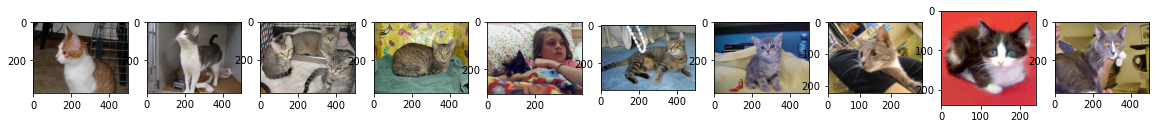

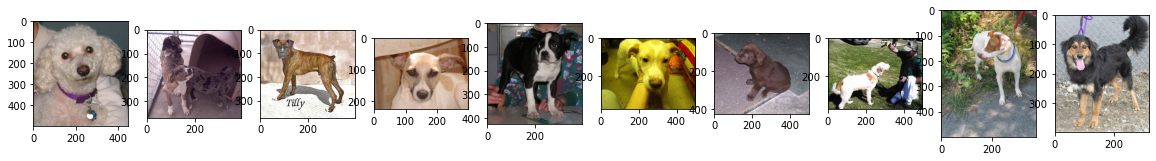

In [7]:
# testing some data 
import matplotlib.pyplot as plt
import matplotlib.image as imgplt

cat_path = '../tmp2/PetImages/Cat/'
cat_files = os.listdir(cat_path)
fig, ax = plt.subplots(1,10, figsize=(20,5))
for i in range(10):
    fn = cat_path+cat_files[i]
    img = imgplt.imread(fn)
    ax[i].imshow(img)


dog_path = '../tmp2/PetImages/Dog/'
dog_files = os.listdir(dog_path)
fig, ax = plt.subplots(1,10, figsize=(20,5))
for i in range(10):
    fn = dog_path+dog_files[i]
    img = imgplt.imread(fn)
    ax[i].imshow(img)


In [8]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Metal device set to: Apple M1


2022-01-20 23:20:17.867670: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-20 23:20:17.868487: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


### Notes:

For tests and memory considerations, we can use a batch size of 10 (`batch_size=10`) for the `train_generator` and the `validation_generator`. 

In [9]:
TRAINING_DIR = 'tmp/cats-v-dogs/training/'
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = 'tmp/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator(rescale=1/255.,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        fill_mode='nearest')

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=10,
                                                              class_mode='binary',
                                                              target_size=(150, 150))



# Expected Output:
# Found 2700 images belonging to 2 classes.
# Found 300 images belonging to 2 classes.

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [13]:
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)


Epoch 1/10
270/270 [==============================] - 14s 50ms/step - loss: 0.6330 - accuracy: 0.6659 - val_loss: 0.7348 - val_accuracy: 0.6233
Epoch 2/10
270/270 [==============================] - 12s 44ms/step - loss: 0.6170 - accuracy: 0.6630 - val_loss: 0.6898 - val_accuracy: 0.5900
Epoch 3/10
270/270 [==============================] - 12s 44ms/step - loss: 0.6066 - accuracy: 0.6763 - val_loss: 0.7021 - val_accuracy: 0.6300
Epoch 4/10
270/270 [==============================] - 12s 45ms/step - loss: 0.5987 - accuracy: 0.6830 - val_loss: 0.5891 - val_accuracy: 0.6933
Epoch 5/10
270/270 [==============================] - 12s 44ms/step - loss: 0.6089 - accuracy: 0.6730 - val_loss: 0.6845 - val_accuracy: 0.6167
Epoch 6/10
270/270 [==============================] - 13s 48ms/step - loss: 0.6016 - accuracy: 0.6748 - val_loss: 0.6828 - val_accuracy: 0.6400
Epoch 7/10
270/270 [==============================] - 12s 44ms/step - loss: 0.5912 - accuracy: 0.6867 - val_loss: 0.6255 - val_accuracy:

Text(0.5, 1.0, 'Training and validation loss')

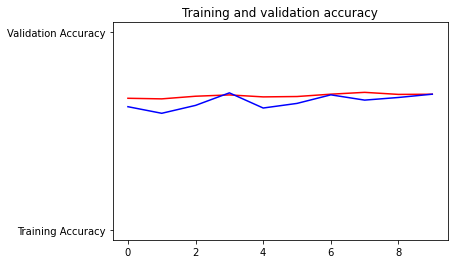

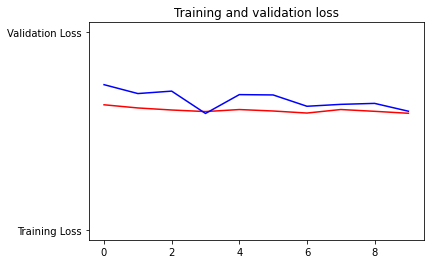

In [14]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)